<a href="https://colab.research.google.com/github/JWiseman-git/ml_sandbox/blob/main/tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro

Covering the basics on tensorflow in prep for an interview

- building some basic flows to get a feel for the tools
- Follows this build pattern: load → build → compile → train → evaluate → predict
- Tensorflow is the engine - handles tensors, automatic differentiation, GPU/TPU execution, distributed training, graph optimisation.
- keras is the API interface: it gives you a clean, Pythonic way to define, train, and evaluate neural networks without touching the low-level plumbing.

In [1]:
import tensorflow as tf

# constant is used to create tensors
tensor3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])


### Design guide

**Which activation function to use**
- For most of the hidden layers using ReLU is fine. Cheap to compute and avoids vanishing gradient
- For binary classification - use sigmoid - output is 0 or 1.
- For multi class classification - use softmax - outputs 1 - probability of a given class
- For regression - no activation function needed - use linear

**which loss function to use**

- Regression: Mean Squared Error - errors are penalised quadratically - sensitive to outliers
- Regression: MAE - outliers exist but you want robust predictions - les sensitive to outliers
- binary classification - binary cross entropy - output is a probability
- multi class classification - categorical cross entropy - use when class being predicted


**which optimizer to use**

- SGD + Momentum - faster convergence than vanilla - better on large scale data and image classification
- Adam optimizer - fast convergence, usually default - smaller datasets and NLP tasks

In [4]:
from tensorflow import keras

# 1. Load and prepare data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize - performed to speed up training - faster converge

# Always 255 for image normalization

# 2. Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# 5. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# 6. Predict
predictions = model.predict(X_test[:5])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8618 - loss: 0.4856 - val_accuracy: 0.9463 - val_loss: 0.1859
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9586 - loss: 0.1409 - val_accuracy: 0.9657 - val_loss: 0.1209
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9726 - loss: 0.0922 - val_accuracy: 0.9674 - val_loss: 0.1090
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9799 - loss: 0.0695 - val_accuracy: 0.9721 - val_loss: 0.0948
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9847 - loss: 0.0526 - val_accuracy: 0.9751 - val_loss: 0.0890
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


### Vanishing gradient problem

- occurs in backpropagation when gradients become too small - making it difficult for the model to coverge
- occurs when using sigmoid or Tanh - derivatives are less than 1 meaning earlier layers cannot converge

**Fixes**

- using ReLU prevents vanishing gradient problem
- Batch Normalization  

In [2]:
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(256, activation='relu')(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Flatten converts - N-D to 1-D
# Dropout

In [5]:
# Binary classification
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

# Multi-class with integer labels (most common)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

# Multi-class with one-hot labels
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

(60000, 28, 28)
(60000,)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9754 - val_loss: 0.0878
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9913 - loss: 0.0308 - val_accuracy: 0.9760 - val_loss: 0.0863
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9934 - loss: 0.0219 - val_accuracy: 0.9745 - val_loss: 0.0918
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9956 - loss: 0.0169 - val_accuracy: 0.9753 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9962 - loss: 0.0158 - val_accuracy: 0.9765 - val_loss: 0.0972
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9744 - val_loss: 0.1016
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9747 - val_loss: 0.1035
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy

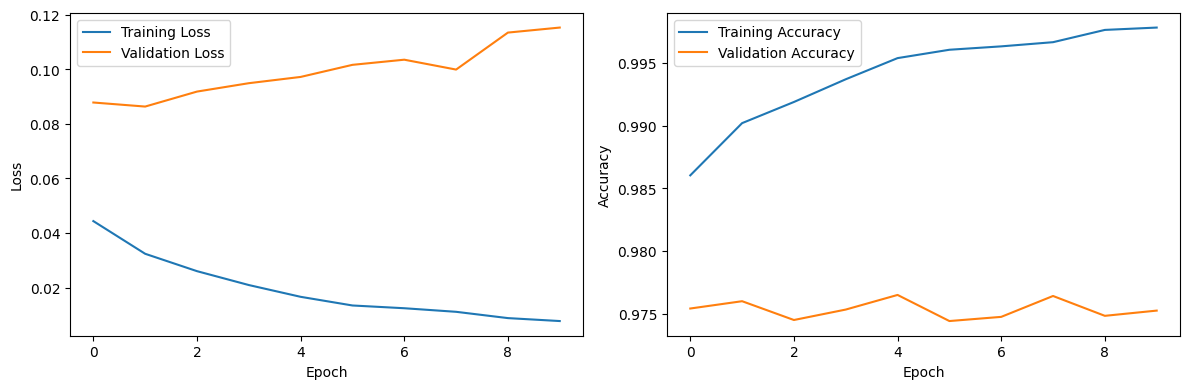

In [12]:
print(X_train.shape)
print(y_train.shape)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,                        # Number of passes through data
    batch_size=32,                    # Samples per gradient update
    validation_split=0.2,             # Use 20% of training data for validation
    # # OR
    # validation_data=(X_val, y_val),   # Explicit validation set
    # verbose=1                         # 0=silent, 1=progress bar, 2=one line/epoch
)

# history.history is a dict with training metrics
print(history.history.keys())
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

print()

# For classification: get predicted class
predicted_classes = tf.argmax(predictions, axis=1)

# For single sample
single_prediction = model.predict(X_test[0:1])  # Keep batch dimension

Test Accuracy: 0.9759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


### Overfitting

The above example demonstrates overfitting

- Training loss decreases while validation loss increases
- Large gap between training and validation accuracy
- Model memorizes training data instead of learning patterns

Resolve using:
- drop out techniques - randomly set a fraction of inputs to 0 during training
- stopping early when validation loss stops improving
- reduce model complexity - prevents building to fit one dataset
- data augementation using images

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Add Flatten layer here
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=5,               # Epochs to wait for improvement
    restore_best_weights=True # Restore model from best epoch
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

print(X_train.shape)
print(y_train.shape)

model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(60000, 28, 28)
(60000,)
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7910 - loss: 0.6542 - val_accuracy: 0.9558 - val_loss: 0.1488
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9346 - loss: 0.2230 - val_accuracy: 0.9640 - val_loss: 0.1209
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9465 - loss: 0.1740 - val_accuracy: 0.9706 - val_loss: 0.0967
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9571 - loss: 0.1415 - val_accuracy: 0.9718 - val_loss: 0.0988
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9600 - loss: 0.1304 - val_accuracy: 0.9723 - val_loss: 0.0917
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9612 - loss: 0.1262 - val_accuracy: 0.9745 - val_loss: 0.0860
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9645 - loss: 0.1185 - val_accuracy: 0.9747 - val_loss: 0.0882
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/

### Callbacks

Callbacks can be passed to keras methods such as fit(), evaluate(), and predict() in order to hook into the various stages of the model training, evaluation, and inference lifecycle.

In [19]:
# Common Callbacks

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Model Checkpoint (save best model)
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)

# Learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,         # Multiply LR by this factor
    patience=3,
    min_lr=1e-6
)

# TensorBoard logging
tensorboard = keras.callbacks.TensorBoard(log_dir='./logs')

# Use multiple callbacks
model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint, lr_scheduler]
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9748 - loss: 0.0812 - val_accuracy: 0.9778 - val_loss: 0.0790 - learning_rate: 0.0010
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9751 - loss: 0.0818 - val_accuracy: 0.9787 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9775 - loss: 0.0726 - val_accuracy: 0.9812 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9782 - loss: 0.0680 - val_accuracy: 0.9783 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9771 - loss: 0.0707 - val_accuracy: 0.9793 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9784 - loss: 0.0679 - val_accuracy: 0.9790 - val_loss: 0.0829 - learning_rate: 0.0010
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accura

#### Template Binary Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

# num_features = X

# Build model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Single output
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Or BinaryCrossentropy()
    metrics=['accuracy']
)

# Train
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Predict
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

#### Template CNN Image Classification

Some layer explanations:

layers.Conv2D(32, (3, 3), activation='relu')

- applies filters to extract feature maps
- adds non linearity via relu

layers.MaxPooling2D((2, 2))

- Downsizes samples - the above reduces each dimension by half


layers.BatchNormalization()

- normalises the data within each batch
- solves the problem of internal covariate shift
- values adjusted by calculated mean

In [ ]:
model = keras.Sequential([
    # Data preprocessing
    # keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),

    # Feature extraction
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Classification
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

### Regularization

Penalise more complex code blocks to avoid overfitting

In [ ]:
# Dropout
layers.Dropout(0.5)

# L2
layers.Dense(64, kernel_regularizer=regularizers.l2(0.01))

# L1
layers.Dense(64, kernel_regularizer=regularizers.l1(0.01))

# Early Stopping
keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

### Training Block

In [ ]:
model.compile(optimizer='adam', loss='...', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, validation_split=0.2, callbacks=[...])
loss, acc = model.evaluate(X_test, y_test)
predictions = model.predict(X_new)

### Ex1 MNIST digit classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8641 - loss: 0.4792 - val_accuracy: 0.9592 - val_loss: 0.1448
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9611 - loss: 0.1318 - val_accuracy: 0.9686 - val_loss: 0.1088
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9743 - loss: 0.0880 - val_accuracy: 0.9732 - val_loss: 0.0953
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9824 - loss: 0.0601 - val_accuracy: 0.9714 - val_loss: 0.1022
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9866 - loss: 0.0463 - val_accuracy: 0.9745 - val_loss: 0.0857
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9720 - val_loss: 0.0940
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0269 - val_accuracy: 0.9762 - val_loss: 0.0889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9937 - loss: 0.0229 -

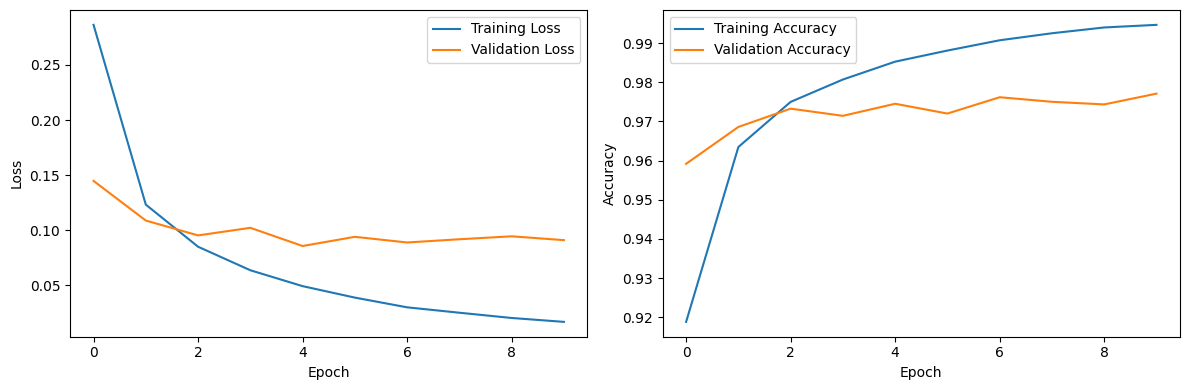

In [27]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    epochs=10,                        # Number of passes through data
    batch_size=32,                    # Samples per gradient update
    validation_split=0.2,             # Use 20% of training data for validation
    # # OR
    # validation_data=(X_val, y_val),   # Explicit validation set
    # verbose=1                         # 0=silent, 1=progress bar, 2=one line/epoch
)

# history.history is a dict with training metrics
print(history.history.keys())
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



### Ex2 Categorical Feature processing

Two key steps:

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# =============================================================================
# Example 1: Sentiment Analysis (Binary Classification)
# Predicting positive/negative from movie reviews
# =============================================================================

# Load IMDB dataset (built into Keras)
vocab_size = 10000
max_length = 250

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(
    num_words=vocab_size
)

# Pad sequences to uniform length
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

# Build model with Embedding layer
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    layers.GlobalAveragePooling1D(),  # Reduces sequence to single vector
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5798 - loss: 0.6743 - val_accuracy: 0.7482 - val_loss: 0.4975
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8159 - loss: 0.4245 - val_accuracy: 0.8574 - val_loss: 0.3351
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8854 - loss: 0.2952 - val_accuracy: 0.8452 - val_loss: 0.3442
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9011 - loss: 0.2460 - val_accuracy: 0.8590 - val_loss: 0.3199
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9136 - loss: 0.2235 - val_accuracy: 0.8798 - val_loss: 0.2955
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9318 - loss: 0.1889 - val_accuracy: 0.8880 - val_loss: 0.2882
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9377 - loss: 0.1708 - val_accuracy: 0.8892 - val_loss: 0.2950
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9512 - loss: 0.1460 - val_accu

In [ ]:
# =============================================================================
# Example 2: Multi-class Text Classification (From Raw Text)
# Predicting programming language tags from Stack Overflow questions
# =============================================================================

# Simulated dataset - in practice, load your own data
raw_texts = [
    "How do I read a file in python using pandas",
    "TypeError undefined is not a function in javascript",
    "NullPointerException when calling method in java",
    "How to create a list comprehension in python",
    "async await promise not working javascript",
    "public static void main string args java",
    "import numpy as np python machine learning",
    "document.getElementById returns null javascript",
]
labels = [0, 1, 2, 0, 1, 2, 0, 1]  # 0=Python, 1=JavaScript, 2=Java

# Convert to numpy arrays
texts = np.array(raw_texts)
labels = np.array(labels)

# Text vectorization layer - converts raw text to integers
max_tokens = 1000
sequence_length = 50

vectorize_layer = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length
)

# Adapt the layer to the training data (builds vocabulary)
vectorize_layer.adapt(texts)

# Check vocabulary
print("Vocabulary sample:", vectorize_layer.get_vocabulary()[:20])

# Build model with TextVectorization included
num_classes = 3

model = keras.Sequential([
    # Preprocessing inside the model
    vectorize_layer,
    layers.Embedding(input_dim=max_tokens, output_dim=64),
    layers.Dropout(0.3),

    # Option A: GlobalAveragePooling (simple, fast)
    layers.GlobalAveragePooling1D(),

    # Option B: Conv1D (captures local patterns)
    # layers.Conv1D(64, 5, activation='relu'),
    # layers.GlobalMaxPooling1D(),

    # Option C: LSTM (captures sequence dependencies)
    # layers.Bidirectional(layers.LSTM(64)),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Integer labels
    metrics=['accuracy']
)

model.summary()

# Train (with more data in practice)
# model.fit(texts, labels, epochs=10, validation_split=0.2)

# Predict on new raw text - no preprocessing needed!
new_texts = [
    "how to use tensorflow keras for deep learning",
    "function arrow syntax es6 react component",
    "spring boot hibernate jpa repository"
]

# predictions = model.predict(np.array(new_texts))
# predicted_classes = tf.argmax(predictions, axis=1)
# class_names = ['Python', 'JavaScript', 'Java']
# for text, pred in zip(new_texts, predicted_classes):
#     print(f"{text[:40]}... -> {class_names[pred]}")

In [ ]:
# =============================================================================
# Example 3: Using Pre-tokenized Text (Common in Assessments)
# When you receive already-processed sequences
# =============================================================================

# Simulated pre-tokenized data (integers representing words)
X_train_tokens = np.random.randint(0, 5000, size=(1000, 100))  # 1000 samples, 100 tokens each
y_train_cats = np.random.randint(0, 5, size=(1000,))  # 5 categories

X_test_tokens = np.random.randint(0, 5000, size=(200, 100))
y_test_cats = np.random.randint(0, 5, size=(200,))

vocab_size = 5000
embedding_dim = 64
num_classes = 5

model = keras.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=100
    ),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train_tokens, y_train_cats,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

model.evaluate(X_test_tokens, y_test_cats)